# 타이타닉 생존자 예측하기
## 1. 데이터 읽고 전체적인 상황 확인하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('../data/titanic_train.csv',index_col='PassengerId')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### 컬럼 정보 확인하기
- PassengerId : 승객 번호
- Survived : 생존여부(1: 생존, 0 : 사망)
- Pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
- Name : 승객 이름
- Sex : 승객 성별
- Age : 승객 나이
- SibSp : 동반한 형제자매, 배우자 수
- Patch : 동반한 부모, 자식 수
- Ticket : 티켓의 고유 넘버
- Fare 티켓의 요금
- Cabin : 객실 번호
- Embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)

In [3]:
raw_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
raw_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
len(raw_data)

891

In [6]:
raw_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

### 각 객실 등급별 분포 수 알아보기
데이타프레임[컬럼명].value_counts()

In [7]:
raw_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### 1등칸 객실 승객의 생존자 수는?

In [8]:
# 1등칸 객실 승객의 생존자 수 
result = raw_data[(raw_data['Pclass'] == 1) & (raw_data['Survived'] == 1)]
result.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [9]:
len(result)

136

### 3등칸 객실 남자 승객의 생존자 수는?

In [10]:
# 성별 컬럼 구성요소 확인하기
raw_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
# 3등칸 객실 남자 승객의 생존자 수 
result = raw_data[(raw_data['Pclass'] == 3) & (raw_data['Survived'] == 1) & (raw_data['Sex'] == 'male')]
result.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S
108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S


In [12]:
len(result)

47

### 전체 생존률 구하기
- (생존자수/전체승객인원)*100

len(raw_data[raw_data['Survived'] == 1])

len(raw_data)

(len(raw_data[raw_data['Survived'] == 1])/len(raw_data))*100

round(숫자, 소수점자리수)
round((len(raw_data[raw_data['Survived'] == 1])/len(raw_data))*100, 3)

퀴즈
1. 여자 생존자수 ? 남자 생존자수 ?
2. 남자와 여자의 생존률 구하기
3. 1등칸의 생존률 구하기


In [13]:
# 전체 생존률
(len(raw_data[raw_data['Survived'] == 1])/len(raw_data))*100

38.38383838383838

In [14]:
# 여자 생존자수
result_female = raw_data[(raw_data['Sex'] == 'female') & (raw_data['Survived'] == 1)]
print('여자 생존자수 : ', len(result_female))

# 남자 생존자수
result_male = raw_data[(raw_data['Sex'] == 'male') & (raw_data['Survived'] == 1)]
print('남자 생존자수 : ', len(result_male))

여자 생존자수 :  233
남자 생존자수 :  109


In [15]:
raw_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
# 남자와 여자의 생존률 구하기 

print('여자 : ', (len(result_female)/len(raw_data[raw_data['Sex'] == 'female']))*100, '%')
print('남자 : ', (len(result_male)/len(raw_data[raw_data['Sex'] == 'male']))*100, '%')

여자 :  74.20382165605095 %
남자 :  18.890814558058924 %


In [17]:
# 1등칸의 생존률 구하기 

print('1등칸 생존률 : ', 
      round((len(raw_data[(raw_data['Pclass'] == 1) & (raw_data['Survived'] == 1)])
            /len(raw_data[raw_data['Pclass'] == 1])) * 100, 2), '%')

1등칸 생존률 :  62.96 %


## 결측값(NaN) 확인하기

In [18]:
# 결측값(NaN) 이면 True
raw_data['Age'].isnull().head()

PassengerId
1    False
2    False
3    False
4    False
5    False
Name: Age, dtype: bool

In [19]:
# Age 컬럼값에서 결측값(NaN) 총 갯수 확인하기 
len(raw_data[raw_data['Age'].isnull()])

177

In [20]:
raw_data['Age'].isnull().sum()

177

### 'Age' 컬럼의 결측값(NaN)을 평균값으로 대체하기

In [21]:
# 평균값
age_avr = round(raw_data['Age'].mean(),2)
age_avr

29.7

In [22]:
# 평균값을 'Age' 컬럼의 NaN으로 교체
raw_data.loc[raw_data['Age'].isnull(), 'Age'] = age_avr

In [23]:
# Age 컬럼값에서 결측값(NaN) 총 갯수 확인하기 
len(raw_data[raw_data['Age'].isnull()])

0

In [24]:
raw_data.sort_values(by=['Age'], ascending=True).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


## Quiz
1) 'Cabin' 결측값 NaN 을 공백으로 교체하기

2) 'Embarked'컬럼에서 아래와 같이 데이터값을 교체한다.
 - C -> France
 - Q -> New Zealand
 - S -> England

In [25]:
len(raw_data.loc[raw_data['Cabin'].isnull()])

687

In [26]:
raw_data.loc[raw_data['Cabin'].isnull(), 'Cabin'] = " "

In [27]:
len(raw_data.loc[raw_data['Cabin'].isnull()])

0

In [28]:
raw_data.loc[raw_data['Embarked']=='C', 'Embarked'] = "France"
raw_data.loc[raw_data['Embarked']=='Q', 'Embarked'] = "New Zealand"
raw_data.loc[raw_data['Embarked']=='S', 'Embarked'] = "England"

In [29]:
raw_data[['Name','Embarked']].head(7)

,Name,Embarked
PassengerId,,
1,"Braund, Mr. Owen Harris",England
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",France
3,"Heikkinen, Miss. Laina",England
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",England
5,"Allen, Mr. William Henry",England
6,"Moran, Mr. James",New Zealand
7,"McCarthy, Mr. Timothy J",England


In [30]:
raw_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

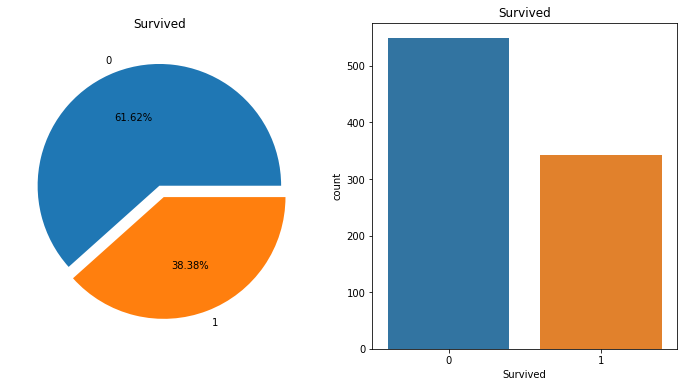

In [31]:
f,ax=plt.subplots(1,2,figsize=(12,6))

raw_data['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                             autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=raw_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

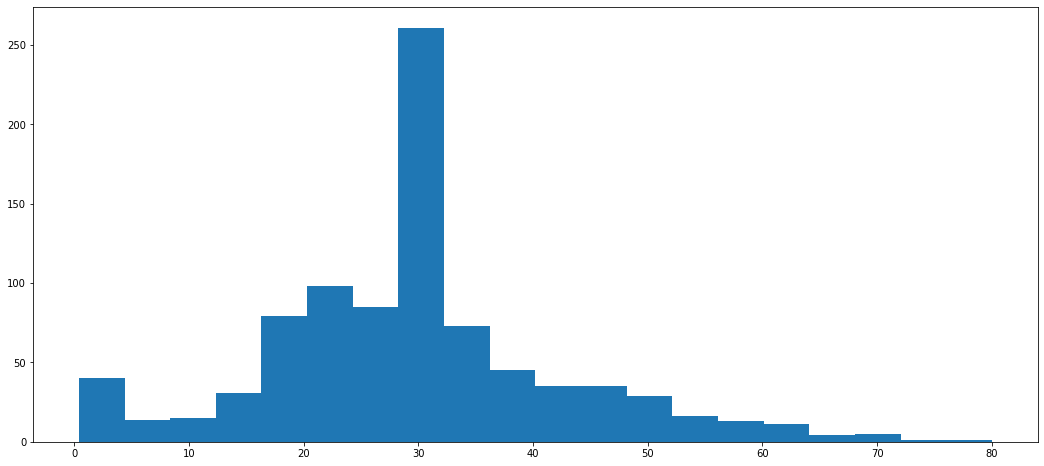

In [32]:
raw_data['Age'].hist(bins=20,figsize=(18,8),grid=False);

In [33]:
raw_data.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,37.048241,0.416667,0.356481,84.154687
2,0.472826,29.867011,0.402174,0.380435,20.662183
3,0.242363,26.403503,0.615071,0.393075,13.675550


In [34]:
raw_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069811,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331334,0.083081,0.018443,-0.549500
Age,-0.069811,-0.331334,1.000000,-0.232624,-0.179194,0.091563
SibSp,-0.035322,0.083081,-0.232624,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179194,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091563,0.159651,0.216225,1.000000


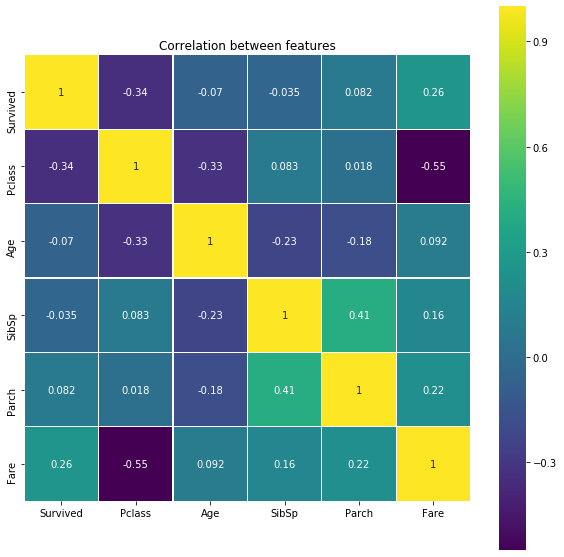

In [35]:
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

## 나이 구간별 및 성별 생존률 확인하기

In [36]:
raw_data['Age_cat'] = pd.cut(raw_data['Age'], 
                             bins=[0, 3, 7, 15, 30, 60, 100], 
                             include_lowest=True, 
                             labels=['baby', 'children', 'teenage', 
                                     'young', 'adult', 'old'])
raw_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,England,young
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,France,adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,England,young
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,England,adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,England,adult


In [37]:
raw_data.groupby('Age_cat').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age_cat,,,,,,
baby,0.666667,2.533333,1.672333,1.733333,1.366667,33.364307
children,0.700000,2.650000,4.950000,1.750000,1.350000,27.905830
teenage,0.454545,2.696970,11.500000,1.727273,1.121212,35.217430
young,0.335984,2.487078,25.527634,0.429423,0.234592,25.954455
adult,0.420495,1.954064,41.132509,0.363958,0.392226,42.429225
old,0.227273,1.590909,66.022727,0.136364,0.272727,41.371214


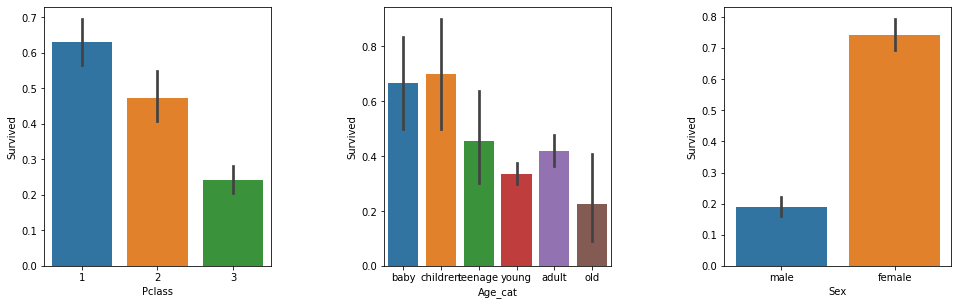

In [38]:
plt.figure(figsize=[14,4])
plt.subplot(131)
sns.barplot('Pclass', 'Survived', data=raw_data)
plt.subplot(132)
sns.barplot('Age_cat', 'Survived', data=raw_data)
plt.subplot(133)
sns.barplot('Sex', 'Survived', data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

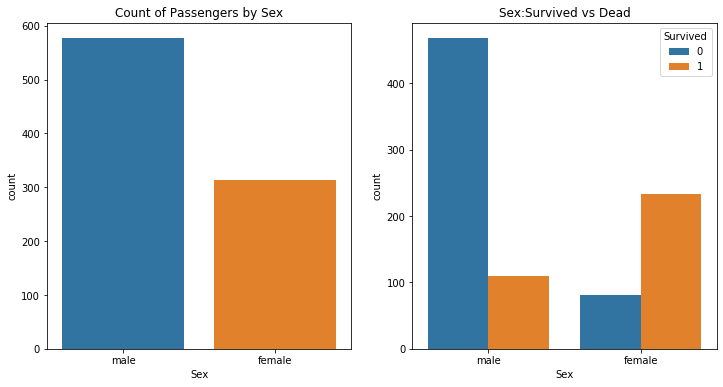

In [39]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('Sex',data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('Sex',hue='Survived',data=raw_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

## 귀족들의 생존률만 다시 조사해보기

- 이름에 호칭이 포함되어 있다

In [40]:
raw_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,England,young
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,France,adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,England,young
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,England,adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,England,adult


In [41]:
raw_data.loc[1, 'Name']

'Braund, Mr. Owen Harris'

In [42]:
raw_data.loc[1, 'Name'].split(',')[1]

' Mr. Owen Harris'

In [43]:
raw_data.loc[1, 'Name'].split(',')[1].split('.')[0]

' Mr'

In [44]:
raw_data.loc[1, 'Name'].split(',')[1].split('.')[0].strip()

'Mr'

In [45]:
test = lambda x: x+2
test(2)

4

In [46]:
list(map(test, range(5)))

[2, 3, 4, 5, 6]

In [47]:
conversion_rare = lambda x: x.split(',')[1].split('.')[0].strip()
raw_data['title'] = raw_data['Name'].map(conversion_rare)

titles = raw_data['title'].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [48]:
pd.crosstab(raw_data['title'], raw_data['Sex'])

Sex,female,male
title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [49]:
raw_data['title'] = raw_data['title'].replace('Mlle', 'Miss')
raw_data['title'] = raw_data['title'].replace('Ms', 'Miss')
raw_data['title'] = raw_data['title'].replace('Mme', 'Mrs')

Rare = ['Lady','the Countess','Countess','Capt', 'Master',
        'Col','Don','Dr','Major','Rev','Sir','Jonkheer', 'Dona']

for each in Rare:
    raw_data['title'] = raw_data['title'].replace(each, 'Rare')
    
raw_data['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Rare'], dtype=object)

In [50]:
print (raw_data[['title', 'Survived']].groupby(['title'], as_index=False).mean())

  title  Survived
0  Miss  0.702703
1    Mr  0.156673
2   Mrs  0.793651
3  Rare  0.492063


In [51]:
raw_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat,title
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,England,young,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,France,adult,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,England,young,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,England,adult,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,England,adult,Mr
